## **Clustering spesies bunga Iris dengan  K-Means Clustering, Agglomerative Clustering, dan DBSCAN.**

0. Importing necessary libraries

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

1. Load the Iris dataset

In [ ]:
# Memuat dataset Iris yang sudah tersedia di scikit-learn
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)


2. Display the first few rows of the dataset

In [ ]:
# Menampilkan 5 baris pertama dari data X menggunakan fungsi print() untuk melihat struktur data
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


3. Determine the optimal number of clusters using the Elbow Method

In [ ]:
# Menentukan jumlah klaster yang optimal untuk KMeans menggunakan Metode Elbow
inertia = []
silhouette_scores = []

4. Testing different values of K

In [ ]:
# Menguji berbagai nilai K (jumlah klaster) dari 1 hingga 10
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

5. Plotting the Elbow Method

Text(0, 0.5, 'Inertia')

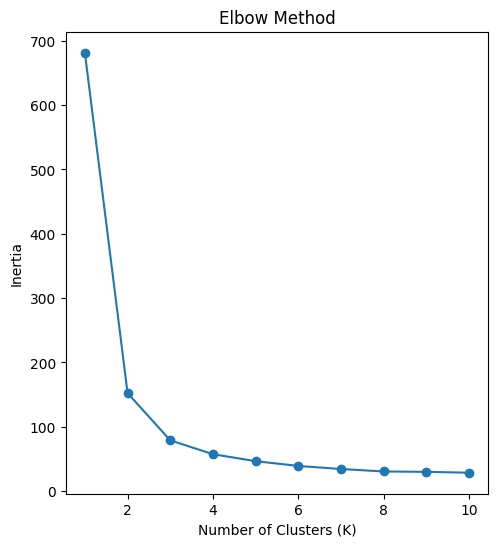

In [ ]:
# Membuat grafik untuk menampilkan Metode Elbow dan Skor Silhouette dan untuk melihat perubahan inertia
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

6. Plotting the Silhouette Scores

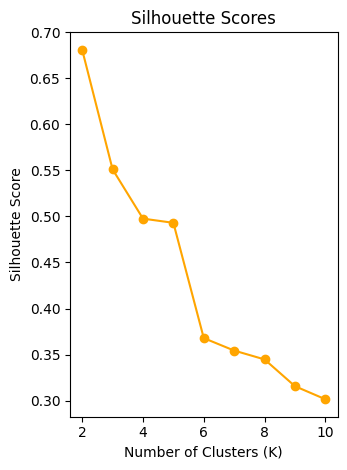

In [ ]:
# Menampilkan grafik Skor Silhouette untuk melihat kualitas klaster
plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

7. Choose optimal K

In [ ]:
# Memilih jumlah klaster yang optimal (dalam contoh ini kita pilih 3 berdasarkan grafik)
optimal_k = 3

8. Using **K-Means Clustering**

In [ ]:
# Membuat dan melatih model KMeans dengan 3 klaster
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Menambahkan label klaster KMeans ke dalam DataFrame X
X['KMeans_Cluster'] = kmeans.labels_

9. Using **Agglomerative Clustering**

In [ ]:
# Membuat dan melatih model Agglomerative Clustering dengan 3 klaster
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
X['Agg_Cluster'] = agg_model.fit_predict(X.iloc[:, :-1])

10. Using **DBSCAN**

In [ ]:
# Membuat dan melatih model DBSCAN dengan parameter eps=0.5 dan min_samples=5
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
X['DBSCAN_Cluster'] = dbscan_model.fit_predict(X.iloc[:, :-1])

11. **K-Means Clustering** result

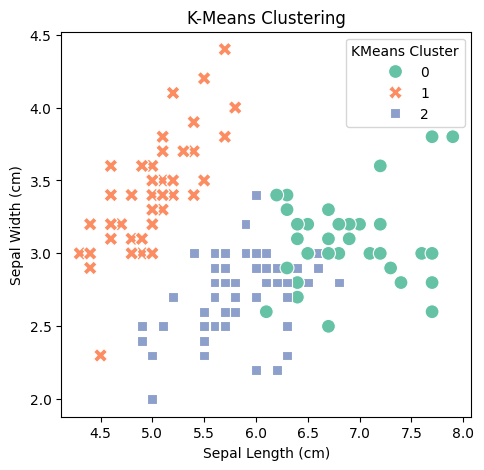

In [ ]:
# Menampilkan scatter plot untuk klasterisasi KMeans
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue='KMeans_Cluster', palette='Set2', style='KMeans_Cluster', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='KMeans Cluster')

12. **Agglomerative Clustering** result

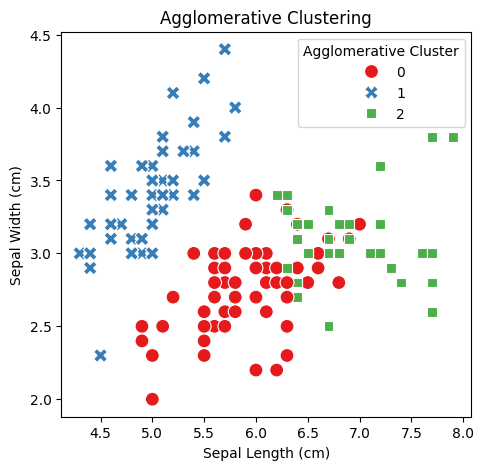

In [ ]:
# Menampilkan scatter plot untuk klasterisasi Agglomerative Clustering
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue='Agg_Cluster', palette='Set1', style='Agg_Cluster', s=100)
plt.title('Agglomerative Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Agglomerative Cluster')

13. **DBSCAN** result

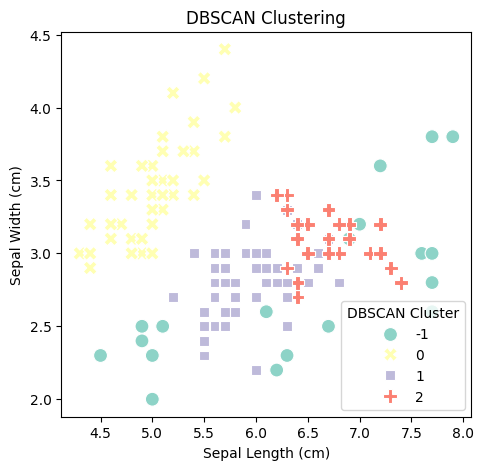

In [ ]:
# Menampilkan scatter plot untuk klasterisasi DBSCAN
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue='DBSCAN_Cluster', palette='Set3', style='DBSCAN_Cluster', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='DBSCAN Cluster')

15. print the cluster centers

In [ ]:
# Menampilkan pusat klaster dari hasil KMeans
print('KMeans Cluster Centers:')
print(kmeans.cluster_centers_)

KMeans Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


1. Penjelasan Hasil:
- Elbow Method dan Silhouette Scores:

 - Pada tahap awal, grafik Elbow Method dan Silhouette Scores digunakan untuk menentukan jumlah klaster yang optimal untuk model KMeans.
 - Elbow Method menunjukkan titik di mana penurunan inertia mulai melambat secara signifikan. Titik ini mengindikasikan jumlah klaster yang optimal. Pada kode ini, grafik menunjukkan bahwa jumlah klaster yang optimal adalah 3, di mana grafik mulai mengalami pelambatan (elbow).
 - Silhouette Score mengukur seberapa baik klasterisasi yang dilakukan. Semakin tinggi nilai silhouette, semakin baik klasterisasi tersebut. Nilai skor ini dihitung untuk K > 1, dan skor tertinggi muncul pada K=3, yang menunjukkan bahwa pembagian klaster di angka ini cukup baik.

- Model KMeans:
 - Setelah menentukan jumlah klaster optimal sebanyak 3 klaster, model KMeans dibuat dan dilatih.
 - Hasil dari model ini berupa label klaster yang mengelompokkan data berdasarkan fitur sepal dan petal pada dataset Iris.
 - Visualisasi hasil klaster KMeans menunjukkan pengelompokan data dalam tiga kelompok dengan warna yang berbeda. Model ini cukup efektif dalam memisahkan data ke dalam klaster berdasarkan fitur yang ada.

- Agglomerative Clustering:
 - Model ini juga menggunakan jumlah klaster yang sama, yaitu 3, untuk membandingkan hasilnya dengan KMeans.
 - Hasil klasterisasi Agglomerative Clustering ditampilkan dalam grafik scatter plot. Secara visual, hasil ini menunjukkan perbedaan dalam cara pengelompokan dibandingkan dengan KMeans, terutama dalam hal bentuk dan distribusi klaster.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
 - DBSCAN menggunakan parameter eps=0.5 dan min_samples=5 untuk mengelompokkan data berdasarkan kepadatan.
 - Berbeda dengan KMeans dan Agglomerative Clustering, DBSCAN tidak perlu menentukan jumlah klaster di awal. DBSCAN secara otomatis menentukan klaster berdasarkan kepadatan titik data.
 - DBSCAN juga mampu mengidentifikasi titik-titik outlier atau data yang tidak termasuk dalam klaster mana pun. Titik-titik ini diberi label -1.
 - Visualisasi DBSCAN menunjukkan hasil klasterisasi dengan beberapa data yang tidak terklasifikasi (outlier). Hal ini menunjukkan bahwa DBSCAN bisa lebih fleksibel dalam menangani data yang memiliki kepadatan bervariasi.

- Pusat Klaster KMeans:

 - Pada akhir kode, koordinat pusat klaster dari model KMeans ditampilkan. Pusat klaster ini merepresentasikan titik pusat dari masing-masing klaster yang terbentuk dalam ruang fitur.

2. Kesimpulan

- Pemilihan Model Clustering yang Tepat:

 - KMeans, Agglomerative Clustering, dan DBSCAN memiliki kelebihan masing-masing. KMeans baik digunakan saat jumlah klaster diketahui dan data terdistribusi secara seragam. Agglomerative Clustering cocok untuk data dengan hierarki, sementara DBSCAN sangat baik dalam menangani data dengan bentuk klaster yang tidak teratur serta dalam mendeteksi outlier.

- KMeans dengan 3 Klaster adalah Pilihan Optimal:
 - Berdasarkan Metode Elbow dan skor Silhouette, 3 klaster adalah jumlah yang optimal untuk memisahkan data pada dataset Iris menggunakan KMeans. Visualisasi hasil menunjukkan bahwa pengelompokan ini cukup efektif.

- Perbandingan Antara Metode Clustering:
 - Visualisasi ketiga metode menunjukkan bahwa **KMeans** dan **Agglomerative Clustering** menghasilkan klaster yang serupa, tetapi **DBSCAN** lebih fleksibel karena dapat mendeteksi outlier. Namun, DBSCAN tidak selalu ideal untuk data yang memiliki jarak antar klaster yang seragam, seperti dataset Iris.

- Visualisasi Sangat Membantu Memahami Pengelompokan:
 - Visualisasi hasil klasterisasi memudahkan untuk melihat bagaimana model memisahkan data dan bagaimana bentuk serta ukuran setiap klaster. Ini penting untuk mengevaluasi hasil clustering secara lebih intuitif.

- Pertimbangan Pemilihan Model Berdasarkan Data:
 - Untuk data seperti Iris, di mana distribusi data cukup teratur, KMeans dan Agglomerative Clustering bekerja dengan baik. Namun, jika menghadapi data dengan distribusi yang tidak teratur atau terdapat outlier, maka DBSCAN mungkin menjadi pilihan yang lebih tepat.
